## PREDICTIVE MODELING FOR EARLY PCOS RISK IDENTIFICATION


#### ACM40960 PROJECTS IN MATHS MODELING

##### MUSKAAN ARORA (23205389)

### OVERVIEW
Polycystic Ovary Syndrome (PCOS) is a prevalent endocrine disorder affecting women of reproductive age. It is characterized by hormonal imbalances, irregular menstrual cycles, and other health complications such as infertility, diabetes, and cardiovascular diseases.

### OBJECTIVE
This study aims to develop a machine learning model integrated into a web-based application to facilitate the early prediction of PCOS using patient data. 
The dataset has been sourced from kaggle which contains all physical and clinical parameters to determine PCOS and infertility related issues .
It contains 541 patient records with 41 unique features, given as follows:
- PCOS (Y/N): Presence of Polycystic Ovary Syndrome.
- Age (yrs): Age of the individual in years.
- Weight (Kg): Body weight in kilograms.
- Height (Cm): Height in centimeters.
- BMI: Body Mass Index, a measure of body fat based on height and weight.
- Blood Group: The blood type of the individual.
- Pulse rate (bpm): Heartbeats per minute.
- RR (breaths/min): Respiratory rate, breaths per minute.
- Hb (g/dl): Hemoglobin concentration in the blood.
- Cycle (R/I): Regularity or Irregularity of menstrual cycle.
- Cycle length (days): Length of the menstrual cycle in days.
- Marriage Status (Yrs): Duration of marriage in years.
- Pregnant (Y/N): Pregnancy status.
- No. of abortions: Number of abortions.
- I beta-HCG (mIU/mL): First Beta-Human Chorionic Gonadotropin level.
- II beta-HCG (mIU/mL): Second Beta-Human Chorionic Gonadotropin level.
- FSH (mIU/mL): Follicle Stimulating Hormone level.
- LH (mIU/mL): Luteinizing Hormone level.
- FSH/LH: Ratio of FSH to LH.
- Hip (inch): Hip circumference in inches.
- Waist (inch): Waist circumference in inches.
- Waist/Hip Ratio: Ratio of waist to hip circumference.
- TSH (mIU/L): Thyroid Stimulating Hormone level.
- AMH (ng/mL): Anti-Mullerian Hormone level, indicating ovarian reserve.
- PRL (ng/mL): Prolactin hormone level.
- Vit D3 (ng/mL): Vitamin D3 level in the blood.
- PRG (ng/mL): Progesterone hormone level.
- RBS (mg/dl): Random Blood Sugar level.
- Weight gain (Y/N): History of weight gain.
- Hair growth (Y/N): Presence of excessive hair growth.
- Skin darkening (Y/N): Hyperpigmentation of the skin.
-Hair loss (Y/N): Presence of hair loss.
- Pimples (Y/N): Occurrence of acne.
- Fast food (Y/N): Consumption of fast food.
- Reg. Exercise (Y/N): Regularity of physical exercise.
- BP Systolic (mmHg): Systolic blood pressure.
- BP Diastolic (mmHg): Diastolic blood pressure.
- Follicle No. (L): Number of follicles in the left ovary.
- Follicle No. (R): Number of follicles in the right ovary.
- Avg. F size (L) (mm): Average follicle size in the left ovary.
- Avg. F size (R) (mm): Average follicle size in the right ovary.
- Endometrium (mm): Thickness of the endometrium.



### IMPORTING NECESSARY LIBRARIES

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

### IMPORTING THE DATASET


In [70]:
# Load the dataset
df = pd.read_csv("C:/Users/91964/Desktop/PROJECT/PCOS_data.csv")
df = df.drop(columns=[df.columns[-1]])
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


### EXPLORATORY DATA ANALYSIS


In [71]:
# Exploratory Data Analysis (EDA)
df.info()
df.describe()
df['PCOS (Y/N)'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

We have 541 entries in total, where 177 have PCOS and 364 do not have

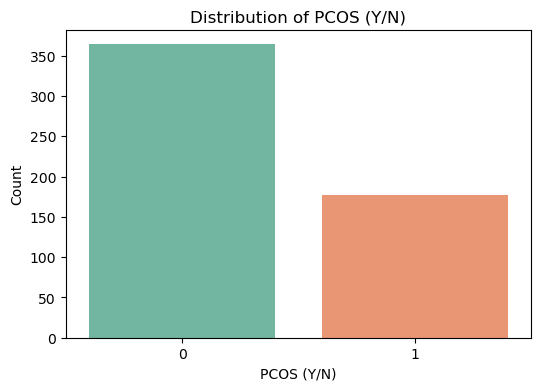

In [72]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='PCOS (Y/N)', data=df, palette='Set2')
plt.title('Distribution of PCOS (Y/N)')
plt.xlabel('PCOS (Y/N)')
plt.ylabel('Count')
plt.show()

### DATA PRE-PROCESSING

In [73]:
# Adjust the categorical features based on the actual column names
categorical_features = ['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 
                        'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

# Convert columns to numeric and handle non-numeric values
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Separate numeric and categorical features
numeric_features = df.columns.drop(['PCOS (Y/N)'] + categorical_features)

# Convert numeric features to numeric type
df = convert_to_numeric(df, numeric_features)

# Handle missing values for numeric features
imputer_numeric = SimpleImputer(strategy='mean')
df_numeric = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_features]), columns=numeric_features)

# Handle missing values for categorical features
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_categorical = pd.DataFrame(imputer_categorical.fit_transform(df[categorical_features]), columns=categorical_features)

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_categorical[col] = le.fit_transform(df_categorical[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_features)

# Merge processed numeric and categorical features
df_imputed = pd.concat([df_numeric, df_categorical, df[['PCOS (Y/N)']]], axis=1)

# Split the dataset into training and testing sets
X = df_imputed.drop(['PCOS (Y/N)'], axis=1)
y = df_imputed['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### STUDYING THE CORRELATION BETWEEN IMPORTANT VARIABLES

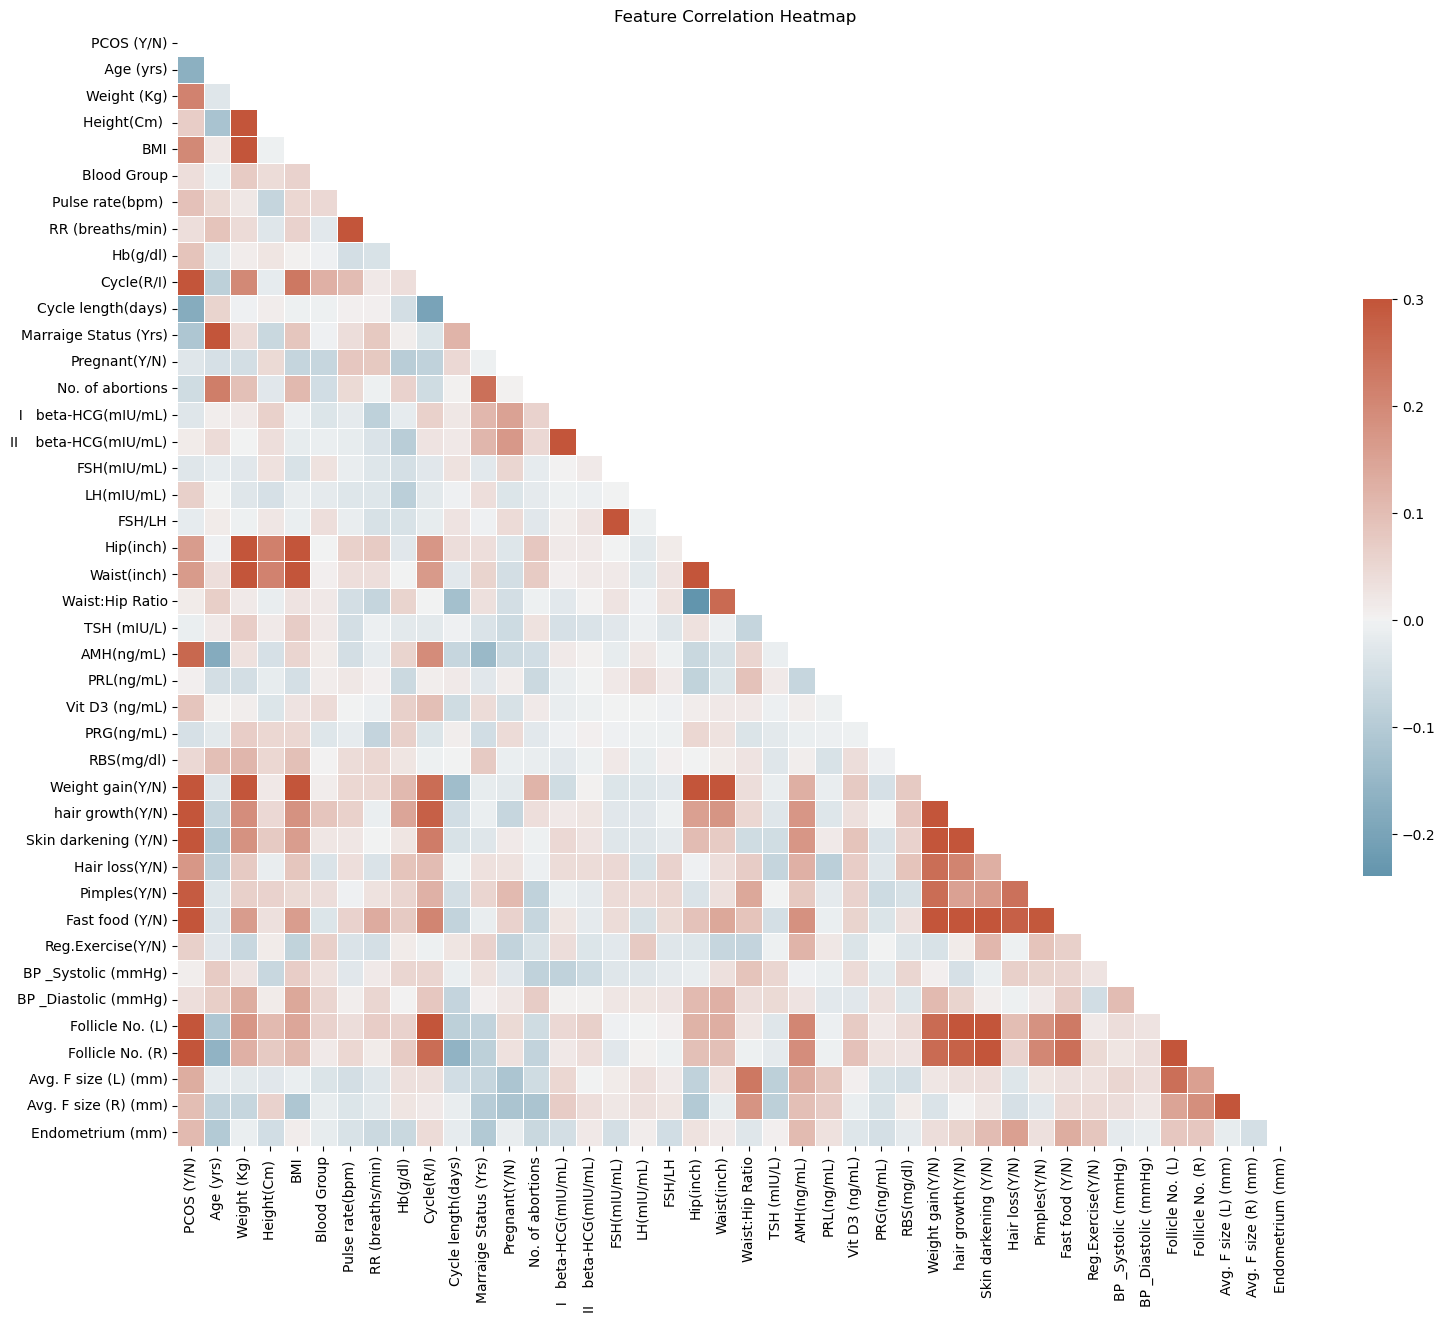

In [74]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()

The figure above shows a correlation heatmap of all the variables, where the darker red shade shows a strong positive correlation but the blue shade shows a negative correlation.

- PCOS (Y/N): The first row/column shows the correlation of PCOS (Y/N) with other variables. For instance, we can see that some features like BMI or Waist
Ratio may have a noticeable correlation with PCOS.

- Age, Weight, and BMI: There is some degree of correlation among these, as expected, since weight and height determine BMI.

- Hormonal Levels: Features like FSH, LH, and their ratio (FSH/LH) show correlations, which is consistent with how these hormones interact in the body.

- Cycle Length and Cycle Regularity: There might be correlations between menstrual cycle-related features and PCOS, reflecting the impact of PCOS on menstrual health.


### MODEL TRAINING AND EVALUATION

Here, I will use the below machine learning algorithms then I will select the best one based on its classification report.

- Support Vector Machine
- Random Forest
- Ada Boost
- Gradient Boosting
- Logistic regression

SVM Evaluation:
Accuracy: 0.87
Precision: 0.82
Recall: 0.72
F1 Score: 0.77
ROC AUC: 0.94


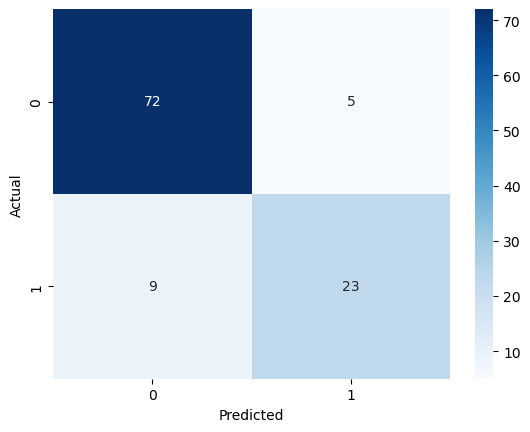

Random Forest Evaluation:
Accuracy: 0.86
Precision: 0.81
Recall: 0.69
F1 Score: 0.75
ROC AUC: 0.95


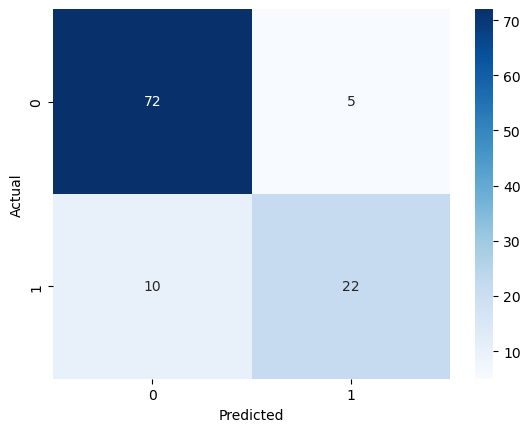

Gradient Boosting Evaluation:
Accuracy: 0.85
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
ROC AUC: 0.93


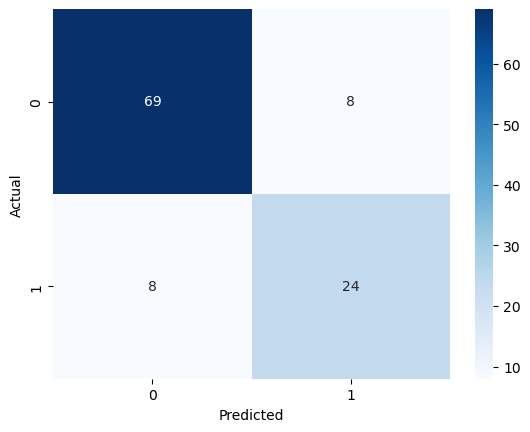

AdaBoost Evaluation:
Accuracy: 0.87
Precision: 0.85
Recall: 0.69
F1 Score: 0.76
ROC AUC: 0.94


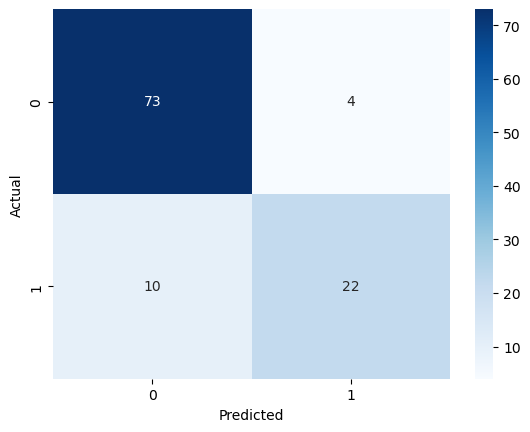

Logistic Regression Evaluation:
Accuracy: 0.86
Precision: 0.81
Recall: 0.69
F1 Score: 0.75
ROC AUC: 0.92


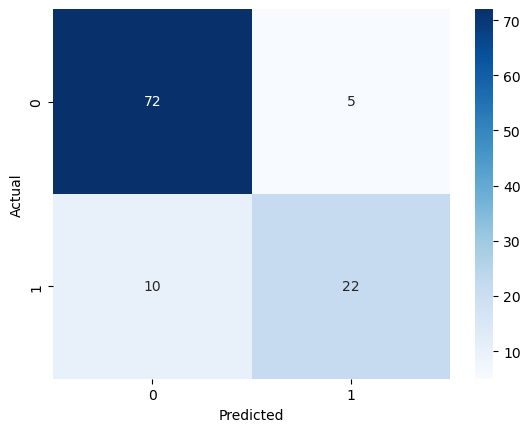

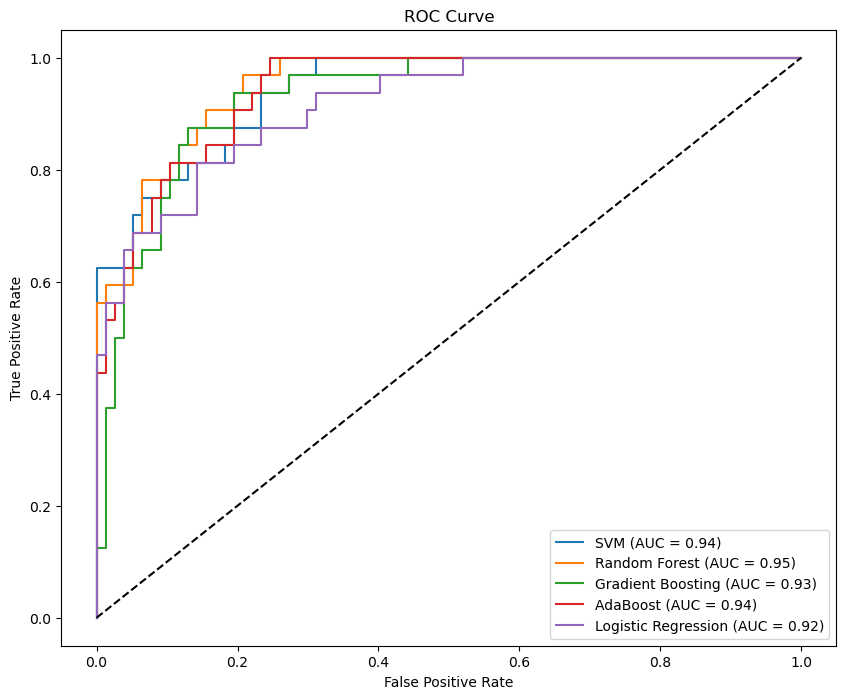

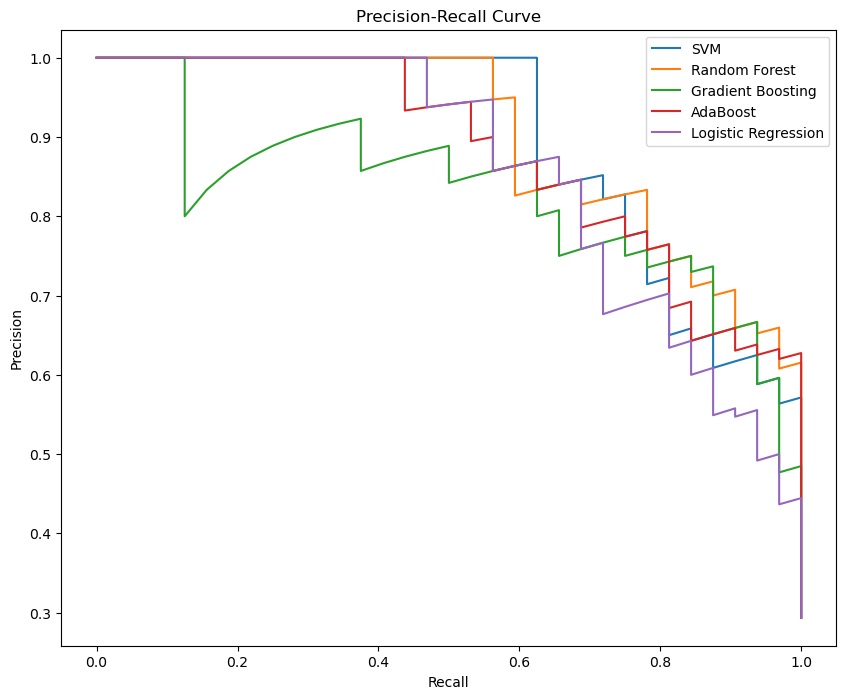

In [75]:
# Hyperparameter tuning and model training
def hyperparameter_tuning(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc')
    grid.fit(X_train, y_train)
    return grid.best_estimator_

# SVM
svm = SVC(probability=True, random_state=42)
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svm_best = hyperparameter_tuning(svm, svm_params, X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_best = hyperparameter_tuning(rf, rf_params, X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
gb_best = hyperparameter_tuning(gb, gb_params, X_train, y_train)

# AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
ab_best = hyperparameter_tuning(ab, ab_params, X_train, y_train)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr_params = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
lr_best = hyperparameter_tuning(lr, lr_params, X_train, y_train)

# Model evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate models
models = {'SVM': svm_best, 'Random Forest': rf_best, 'Gradient Boosting': gb_best, 'AdaBoost': ab_best, 'Logistic Regression': lr_best}

for name, model in models.items():
    print(f"{name} Evaluation:")
    evaluate_model(model, X_test, y_test)

# ROC Curve for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



The Random Forest model emerged as the best performer, achieving the highest ROC AUC (95%) and providing the most balanced trade-off between precision and recall, making it the optimal choice for our PCOS prediction application 

#### FEATURE IMPORTANCE VISUALISATION FOR RANDOM FOREST MODEL

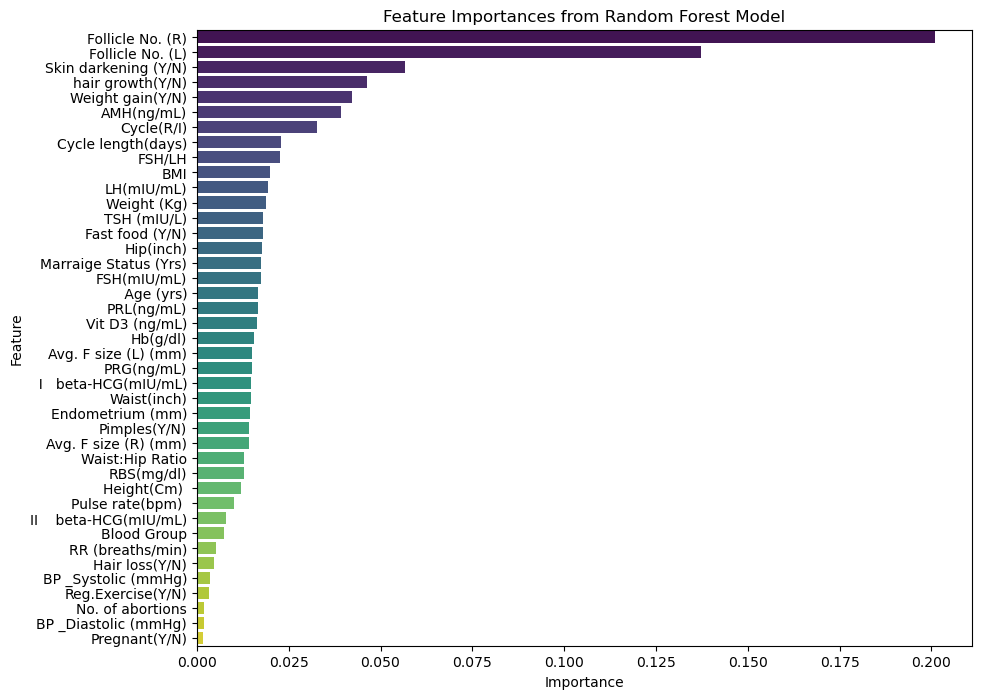

In [76]:
# Feature Importance Visualization for Random Forest with Different Colors
if hasattr(rf_best, 'feature_importances_'):
    # Get the feature importances from the best Random Forest model
    feature_importances = rf_best.feature_importances_

    # Create a DataFrame to hold feature names and their importances
    feature_names = X_train.columns  # Assumes X_train is a DataFrame with column names
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort the DataFrame by importance values
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances with different colors
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")  # Using a colorful palette
    plt.title('Feature Importances from Random Forest Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("The model does not have an attribute `feature_importances_`.")




The Random Forest model places the highest importance on features directly related to ovarian health and physical symptoms commonly associated with PCOS, such as follicle count, skin darkening, and hair growth. This aligns with clinical expectations, suggesting that the model is effectively capturing key aspects of the syndrome. Features related to general health and hormonal balance contribute moderately, while others have minimal impact on the model’s predictive power. This insight is useful for understanding which features are most valuable in predicting PCOS and could inform both clinical assessments and further model refinement.

#### SAVING THE BEST MODEL IN A PICKLE FILE

In [77]:
## random forest is the best model
import pickle

# Assuming rf_best is the Random Forest model from the previous code
best_model = rf_best

# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved successfully.")

Best model saved successfully.


#### SUMMARY
In this project, multiple machine learning models, including Support Vector Machine, Random Forest, AdaBoost, Gradient Boosting, and Logistic Regression, were used to predict Polycystic Ovary Syndrome (PCOS). Among these, the Random Forest model demonstrated the best performance.
These results highlight Random Forest as the most effective model for identifying individuals at high risk of PCOS, making it a valuable tool for early detection and management of the condition.

#### KEY FINDINGS
Features related to ovarian health, hormonal imbalances, and physical symptoms contributed most significantly to the model's predictions, while general health indicators played a more moderate role.

#### IMPLICATIONS
This model can serve as a valuable tool for early detection and diagnosis of PCOS, enabling timely intervention and better management of the condition.
The insights gained from feature importance analysis can inform clinical practices, highlighting which patient data should be prioritized during assessments.

#### FUTURE SCOPE
The model can be further enhanced by integrating additional data sources, such as longitudinal health records or real-time data from wearable devices.
Incorporating user-friendly features like a symptom tracker, appointment scheduler, and personalized health plans could make this tool more comprehensive and accessible for both patients and healthcare providers.


